# Holland Pressure

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults
from src.constants import KAT_EX_PATH, NO_BBOX
from src.conversions import millibar_to_pascal, pascal_to_millibar

plot_defaults()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
def ah77(pc):
    return 3.4 * (1010 - pc) ** 0.644

In [4]:
def dvorak(pc):
    return 3.92 * (1015 - pc) ** 0.644

In [5]:
def knaff_and_zehr(pc):
    return 2.3 * (1010 - pc) ** 0.76

In [6]:
import numpy as np
from scipy.constants import R

def bs(vmax, patvmax, pressure_delta, TatVmax):
    return vmax**2 * patvmax * np.e / pressure_delta / R / TatVmax

In [8]:
def bs_h10(vmax, pressuredelta):
    rhoatvmax = 1.15 #kg m s-1
    return vmax**2 * rhoatvmax / pressuredelta * (np.e)

In [3]:
from src.conversions import millibar_to_pascal, pascal_to_millibar

In [10]:
bs_h10(50, millibar_to_pascal(1010-914))

0.8140687767520578

In [13]:
bs_h10(50, millibar_to_pascal(1015-914))

0.7737683422593816

In [ ]:
def h80p(radius, pc, deltap, rmax, b):
    return pc + deltap*np.exp(-(r/rmax)^ b)

def vm(b, rho, deltap):
    return  (b / rho / e * deltap) ** 0.5

In [4]:
class Holland80:
    def __init__(self, pc, rmax, vmax) -> None:
        """ """
        self.pc = pc  # Pa
        self.rho = 1.15  # kg m-3
        self.pn = millibar_to_pascal(1010)  # Pa
        self.rmax = rmax  # meters
        self.vmax = vmax  # meters per second
        self.b_coeff = self.vmax**2 / (self.pn - self.pc) * np.e # dimensionless

    def pressure(self, radii: np.ndarray) -> np.ndarray:
        return self.pn - (self.pn - self.pc) * np.exp(-((radii / self.rmax) ** self.b_coeff))
    
    def velocity(self, radii: np.ndarray) -> float:
        return np.sqrt(
            (self.pn - self.pc) * np.exp(-(radii/self.rmax)**self.b_coeff) * (radii / self.rmax) ** self.b_coeff * self.b_coeff
        )

kath80 = Holland80(millibar_to_pascal(915), 20e3, 50)

In [49]:
kath80 = Holland80(millibar_to_pascal(915), 20e3, 50)

In [6]:
radii = np.linspace(0, 1e6, num=int(1e4))

In [8]:
plot_defaults()

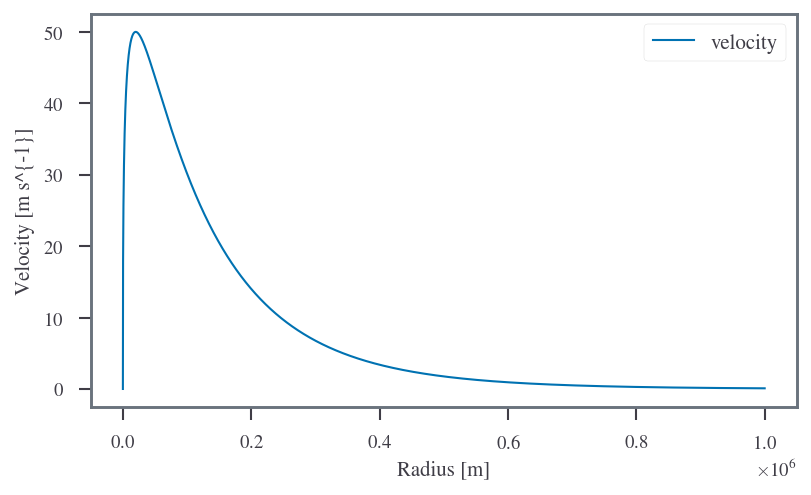

In [9]:

plt.plot(radii, kath80.velocity(radii), label="velocity")
plt.xlabel("Radius [m]")
plt.ylabel("Velocity [m s^{-1}]")
plt.legend()

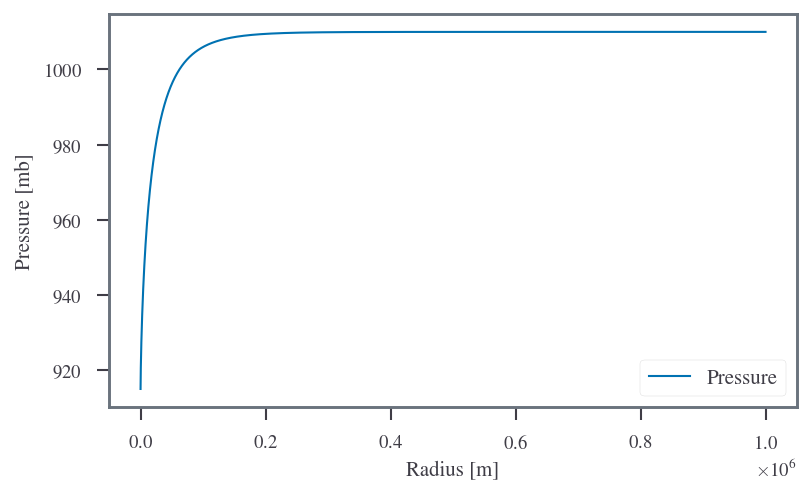

In [12]:
plt.plot(radii, pascal_to_millibar(kath80.pressure(radii)), label="Pressure")
plt.xlabel("Radius [m]")
plt.ylabel("Pressure [mb]")
plt.legend()